In [1]:
#importations
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# We will display plots right inside Jupyter Notebook
%matplotlib inline
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

Using Theano backend.


In [2]:
#Initializations
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
test_size = 0.33
batch_size=32
epochs=20


In [3]:
#Read the data
data = pd.read_csv("../data/results-20180906.csv")
data.head()

,user_id,PAYMENT_STATUS,avg_airtime_spent,avg_bundles_balance,avg_incoming_calls_duration,avg_mobile_money_amount,avg_mobile_money_balance,avg_mobile_money_received_amount,avg_mobile_money_sent_amount,avg_outgoing_calls_duration,...,number_of_incoming_calls,number_of_missed_calls,number_of_outgoing_calls,number_of_rejected_calls,education_level,employment_status,marital_status,no_of_dependants,unique_call_contacts,unique_mobile_money_contacts
0,b3c43bdb-fded-4c39-afa7-b6c8ec848ba6,PAID,9.84,436.11,38.00,674.58,1431.07,3142.00,258.72,0.0,...,1,1,NaN,0,College/University,Employed,single,1,2,14.0
1,b3c43bdb-fded-4c39-afa7-b6c8ec848ba6,PAID,9.84,436.11,38.00,674.58,1431.07,3142.00,258.72,0.0,...,1,1,NaN,0,College/University,Employed,single,1,2,14.0
2,b3c43bdb-fded-4c39-afa7-b6c8ec848ba6,PAID,9.84,436.11,38.00,674.58,1431.07,3142.00,258.72,0.0,...,1,1,NaN,0,College/University,Employed,single,1,2,14.0
3,c7267fcc-d5c4-4f7c-9d1f-12022544d080,PAID,24.46,49.19,137.14,3051.09,4396.52,4307.73,2462.67,75.7,...,289,124,256.0,0,College/University,Employed,married,2 - 5,110,28.0
4,c7267fcc-d5c4-4f7c-9d1f-12022544d080,PAID,24.46,49.19,137.14,3051.09,4396.52,4307.73,2462.67,75.7,...,289,124,256.0,0,College/University,Employed,married,2 - 5,110,28.0


In [4]:
data.describe()

,avg_airtime_spent,avg_bundles_balance,avg_incoming_calls_duration,avg_mobile_money_amount,avg_mobile_money_balance,avg_mobile_money_received_amount,avg_mobile_money_sent_amount,avg_outgoing_calls_duration,avg_received_bank_amount,avg_sent_bank_amount,no_of_apps,no_received_mobile_money_transactions,no_sent_mobile_money_transactions,number_of_contacts,number_of_incoming_calls,number_of_missed_calls,number_of_outgoing_calls,number_of_rejected_calls,unique_call_contacts,unique_mobile_money_contacts
count,12434.000000,12434.000000,12434.000000,12434.000000,1.243400e+04,12434.000000,12434.000000,12434.000000,12434.000000,12434.000000,12434.000000,12418.000000,12429.000000,12434.000000,12434.000000,12434.000000,12431.000000,12434.000000,12434.000000,12419.000000
mean,36.353835,133.607072,215.116386,1922.385784,2.528895e+06,3105.473823,1418.774196,159.823959,2840.168718,3032.580387,76.286151,159.529634,349.465444,1202.061203,577.787840,286.390783,1105.897193,5.594821,200.712884,52.946775
std,48.302414,399.658045,6716.767758,1882.416892,1.148376e+08,2607.701407,1924.102546,3555.390235,5346.468268,5557.070553,41.757407,161.071116,413.353180,1209.529123,1932.573778,1255.853274,3011.648587,34.784433,131.038763,50.998416
min,0.000000,0.000000,12.200000,42.950000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000
25%,12.932500,17.880000,55.870000,733.132500,1.417990e+03,1301.285000,447.795000,52.330000,0.000000,0.000000,58.000000,57.000000,98.000000,469.000000,228.000000,99.000000,462.000000,0.000000,114.000000,19.000000
50%,26.170000,52.265000,72.310000,1458.085000,2.711410e+03,2444.710000,990.290000,70.470000,222.315000,0.000000,69.000000,115.000000,226.000000,872.000000,389.000000,175.000000,738.000000,0.000000,172.000000,38.000000
75%,46.090000,120.000000,97.110000,2619.015000,4.854105e+03,4131.860000,1900.470000,98.250000,3300.000000,4328.570000,84.000000,203.000000,455.000000,1535.000000,621.000000,297.000000,1205.000000,0.000000,250.000000,70.000000
max,857.140000,15360.000000,409644.190000,61013.300000,5.228796e+09,40926.190000,84016.810000,286341.330000,60120.000000,65000.000000,1280.000000,2525.000000,5625.000000,21672.000000,88271.000000,56058.000000,123468.000000,3070.000000,1288.000000,560.000000


In [5]:
data.keys()

Index(['user_id', 'PAYMENT_STATUS', 'avg_airtime_spent', 'avg_bundles_balance',
       'avg_incoming_calls_duration', 'avg_mobile_money_amount',
       'avg_mobile_money_balance', 'avg_mobile_money_received_amount',
       'avg_mobile_money_sent_amount', 'avg_outgoing_calls_duration',
       'avg_received_bank_amount', 'avg_sent_bank_amount', 'has_another_loan',
       'has_bank_account', 'has_mobile_banking', 'no_of_apps',
       'no_received_mobile_money_transactions',
       'no_sent_mobile_money_transactions', 'number_of_contacts',
       'number_of_incoming_calls', 'number_of_missed_calls',
       'number_of_outgoing_calls', 'number_of_rejected_calls',
       'education_level', 'employment_status', 'marital_status',
       'no_of_dependants', 'unique_call_contacts',
       'unique_mobile_money_contacts'],
      dtype='object')

In [6]:
#Check the datatypes of each variable as well missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12434 entries, 0 to 12433
Data columns (total 29 columns):
user_id                                  12434 non-null object
PAYMENT_STATUS                           12434 non-null object
avg_airtime_spent                        12434 non-null float64
avg_bundles_balance                      12434 non-null float64
avg_incoming_calls_duration              12434 non-null float64
avg_mobile_money_amount                  12434 non-null float64
avg_mobile_money_balance                 12434 non-null float64
avg_mobile_money_received_amount         12434 non-null float64
avg_mobile_money_sent_amount             12434 non-null float64
avg_outgoing_calls_duration              12434 non-null float64
avg_received_bank_amount                 12434 non-null float64
avg_sent_bank_amount                     12434 non-null float64
has_another_loan                         12434 non-null bool
has_bank_account                         12434 non-null bool
has

In [7]:
#Inspect  all variables of type 'object' 
print( data['PAYMENT_STATUS'].unique(),"\n",data['education_level'].unique(),"\n",
      data['employment_status'].unique(),"\n",data['marital_status'].unique(),"\n",
      data['no_of_dependants'].unique())

['PAID' 'IN_DEFAULT'] 
 ['College/University' 'Secondary' 'Masters/Phd' 'Primary' nan 'None'] 
 ['Employed' 'Self employed' 'Student' 'Unemployed' 'Student,Unemployed'
 'Student,Employed' 'Student,Self employed' nan] 
 ['single' 'married' nan] 
 ['1' '2 - 5' 'None' 'more than 5' nan]


In [9]:
# Data Preparation for the above variables

#Dummy Variable for married or single. 
s = pd.get_dummies(data['PAYMENT_STATUS'])
data['status'] = s['PAID'] #set PAID =1 and save results as a new column

edu_as_cat = data['education_level'].astype('category') 
data['education']  = edu_as_cat.cat.codes 

employ_as_cat = data['employment_status'].astype('category') 
data['employment']  = employ_as_cat.cat.codes 

s = pd.get_dummies(data['marital_status'])
data['married'] = s['married'] #set Married =1 and save results as a new column


#Label encoding for no of dependants, employment_status
depend_as_cat = data['no_of_dependants'].astype('category') #1. We first convert the column into a category
data['depend']  = depend_as_cat.cat.codes #2. assign the encoded variable to a new column using the cat.codes

In [10]:
#Define possible features
features  = ['avg_airtime_spent', 'avg_bundles_balance',
       'avg_incoming_calls_duration', 'avg_mobile_money_amount',
       'avg_mobile_money_balance', 'avg_mobile_money_received_amount',
       'avg_mobile_money_sent_amount', 'avg_outgoing_calls_duration',
       'avg_received_bank_amount', 'avg_sent_bank_amount', 'has_another_loan',
       'has_bank_account', 'has_mobile_banking', 'no_of_apps',
       'no_received_mobile_money_transactions',
       'no_sent_mobile_money_transactions', 'number_of_contacts',
       'number_of_incoming_calls', 'number_of_missed_calls',
       'number_of_rejected_calls',
       'education', 'employment', 'married',
       'depend', 'unique_call_contacts',
       'unique_mobile_money_contacts']

In [28]:
data = data.drop_duplicates()
data = data.dropna()
data.shape

(5984, 34)

## Exploratory Analysis

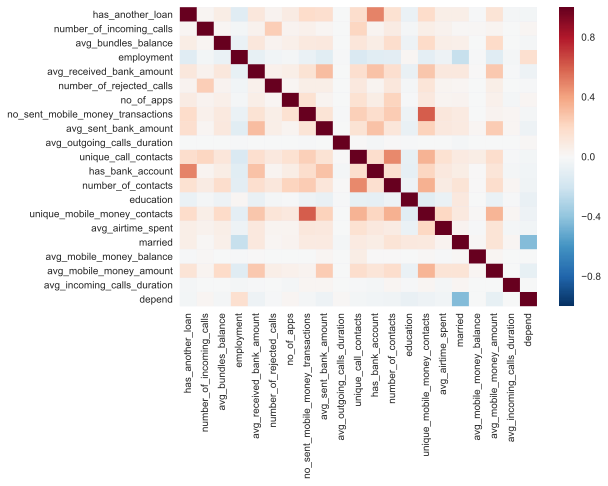

In [29]:
#Check for correlation

df = data.filter(items = features)

# Calculate and plot
corr_matrix = df.corr()
sns.heatmap(corr_matrix);

From the matrix above we can see that these pairs of variables are corelated.

* avg_mobile_money_amount and avg_mobile_money_sent_amount
* avg_mobile_money_amount and avg_mobile_money_received_amount	
* avg_mobile_money_sent_amount and avg_mobile_money_received_amount
* has_mobile_banking and has_bank_account
* no_received_mobile_money_transactions and no_sent_mobile_money_transactions
* number_of_incoming_calls and number_of_missed_calls

In [30]:
#Removing them from the set of features.
features = list(set(features) - 
                 set(['avg_mobile_money_sent_amount', 'avg_mobile_money_received_amount', 'has_mobile_banking', 'no_received_mobile_money_transactions','number_of_missed_calls']))


X = data.filter(items = features)
Y = data['status']

In [31]:

#sns.lmplot('number_of_rejected_calls', 'avg_bundles_balance', data=data, hue='status', fit_reg=False);


# # # `pairplot()` may become very slow with the SVG format
# %config InlineBackend.figure_format = 'png'
# sns.pairplot(df.dropna());

In [32]:

print(X.shape,Y.shape)

(5984, 21) (5984,)


In [26]:
Y.value_counts()

1    4007
0    1977
Name: status, dtype: int64

In [18]:


# #Define the input matrix and output/target 
# X = d.filter(items = features)
X = X.astype(float)
X = np.isnan(X)
X.shape


(5984, 21)

In [19]:

# # baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=21, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [22]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=epochs, batch_size=batch_size, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, Y, cv=kfold)

In [23]:
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Results: 66.96% (0.03%)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.68


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.58      0.14      0.22       592
          1       0.69      0.95      0.80      1204

avg / total       0.65      0.68      0.61      1796



In [41]:
confusion_matrix(y_test, y_pred)

array([[  82,  510],
       [  60, 1144]])